# MapBiomas Fire Classification Algorithms

### Clone the official MapBiomas Fire Network GitHub repository to the temporary disk of Google Colab


In [1]:
### Step A_0_0 - Clone the official MapBiomas Fire Network GitHub repository to the temporary disk of Google Colab
!git clone https://github.com/mapbiomas/brazil-fire


Cloning into 'brazil-fire'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 421 (delta 121), reused 10 (delta 10), pack-reused 190 (from 1)
Receiving objects: 100% (421/421), 4.67 MiB | 6.92 MiB/s, done.
Resolving deltas: 100% (192/192), done.


### Basic authentication and parameterization to using this interfaces and presentation ***Entrenamiento de monitoreo de cicatrices de fuego en regiones de la red mapBiomas***


In [8]:
### Step A_0_1 - Basic parameterizarion and Google Autehenticates to using this interfaces
### Step A_0_2 - Algorithm for logging interface monitoring records in a JSON file on Google Cloud.

# A_0_1 - Basic parameterizarion and Google Autehenticates to using this interfaces
# Country options: ['bolivia', 'colombia', 'chile', 'peru', 'paraguay', 'guyana']
# Specify the country for processing. Options: ['bolivia', 'colombia', 'chile', 'peru', 'paraguay', 'guyana']
country = 'guyana'  # Set the country from the available options
# Define a name for the collection to generate log messages (can be customized for different logs)
collection_name = 'collection_1'

# Import and authenticate libraries for Google cloud services
ee_project = f'mapbiomas-{country}'  # Set the project name based on the selected country
bucket_name = 'mapbiomas-fire'

def authenticates(ee_project,bucketName):
    import ee
    ee.Authenticate()
    ee.Initialize(project=ee_project)

    # Authenticate with Google Cloud (necessary when using Colab)
    from google.colab import auth
    auth.authenticate_user()

    # Initialize Google Cloud Storage client and define the bucket name
    from google.cloud import storage
    client = storage.Client()
    bucket = client.get_bucket(bucketName)

# Call the authentication function with the correct project and bucket names
authenticates(ee_project, bucket_name)

# Define the path to the classification algorithms scripts
algorithms = f'/content/brazil-fire/network/classification_algorithms'

# A_0_2 Algorithm for logging interface monitoring records in a JSON file on Google Cloud.
exec(open(f'{algorithms}/A_0_2_log_algorithm_monitor.py').read())

### Optional step to visualize files in the folders of the Google Cloud Storage bucket
  


In [6]:
### OPTIONAL STEP
# A_0_3 Optional step to visualize files in the folders of the Google Cloud Storage bucket
# This executes a simple interface for exploring files in the bucket
exec(open(f'{algorithms}/A_0_3_simple_gui_to_gcs_explorer_optional.py').read())


Dropdown(description='Countries:', options=('', 'bolivia', 'chile', 'colombia', 'guyana', 'paraguay', 'peru'),…

VBox()

### Optinal presenting PDFs as slides in Google Colab

Label(value='Page 7 of 15')

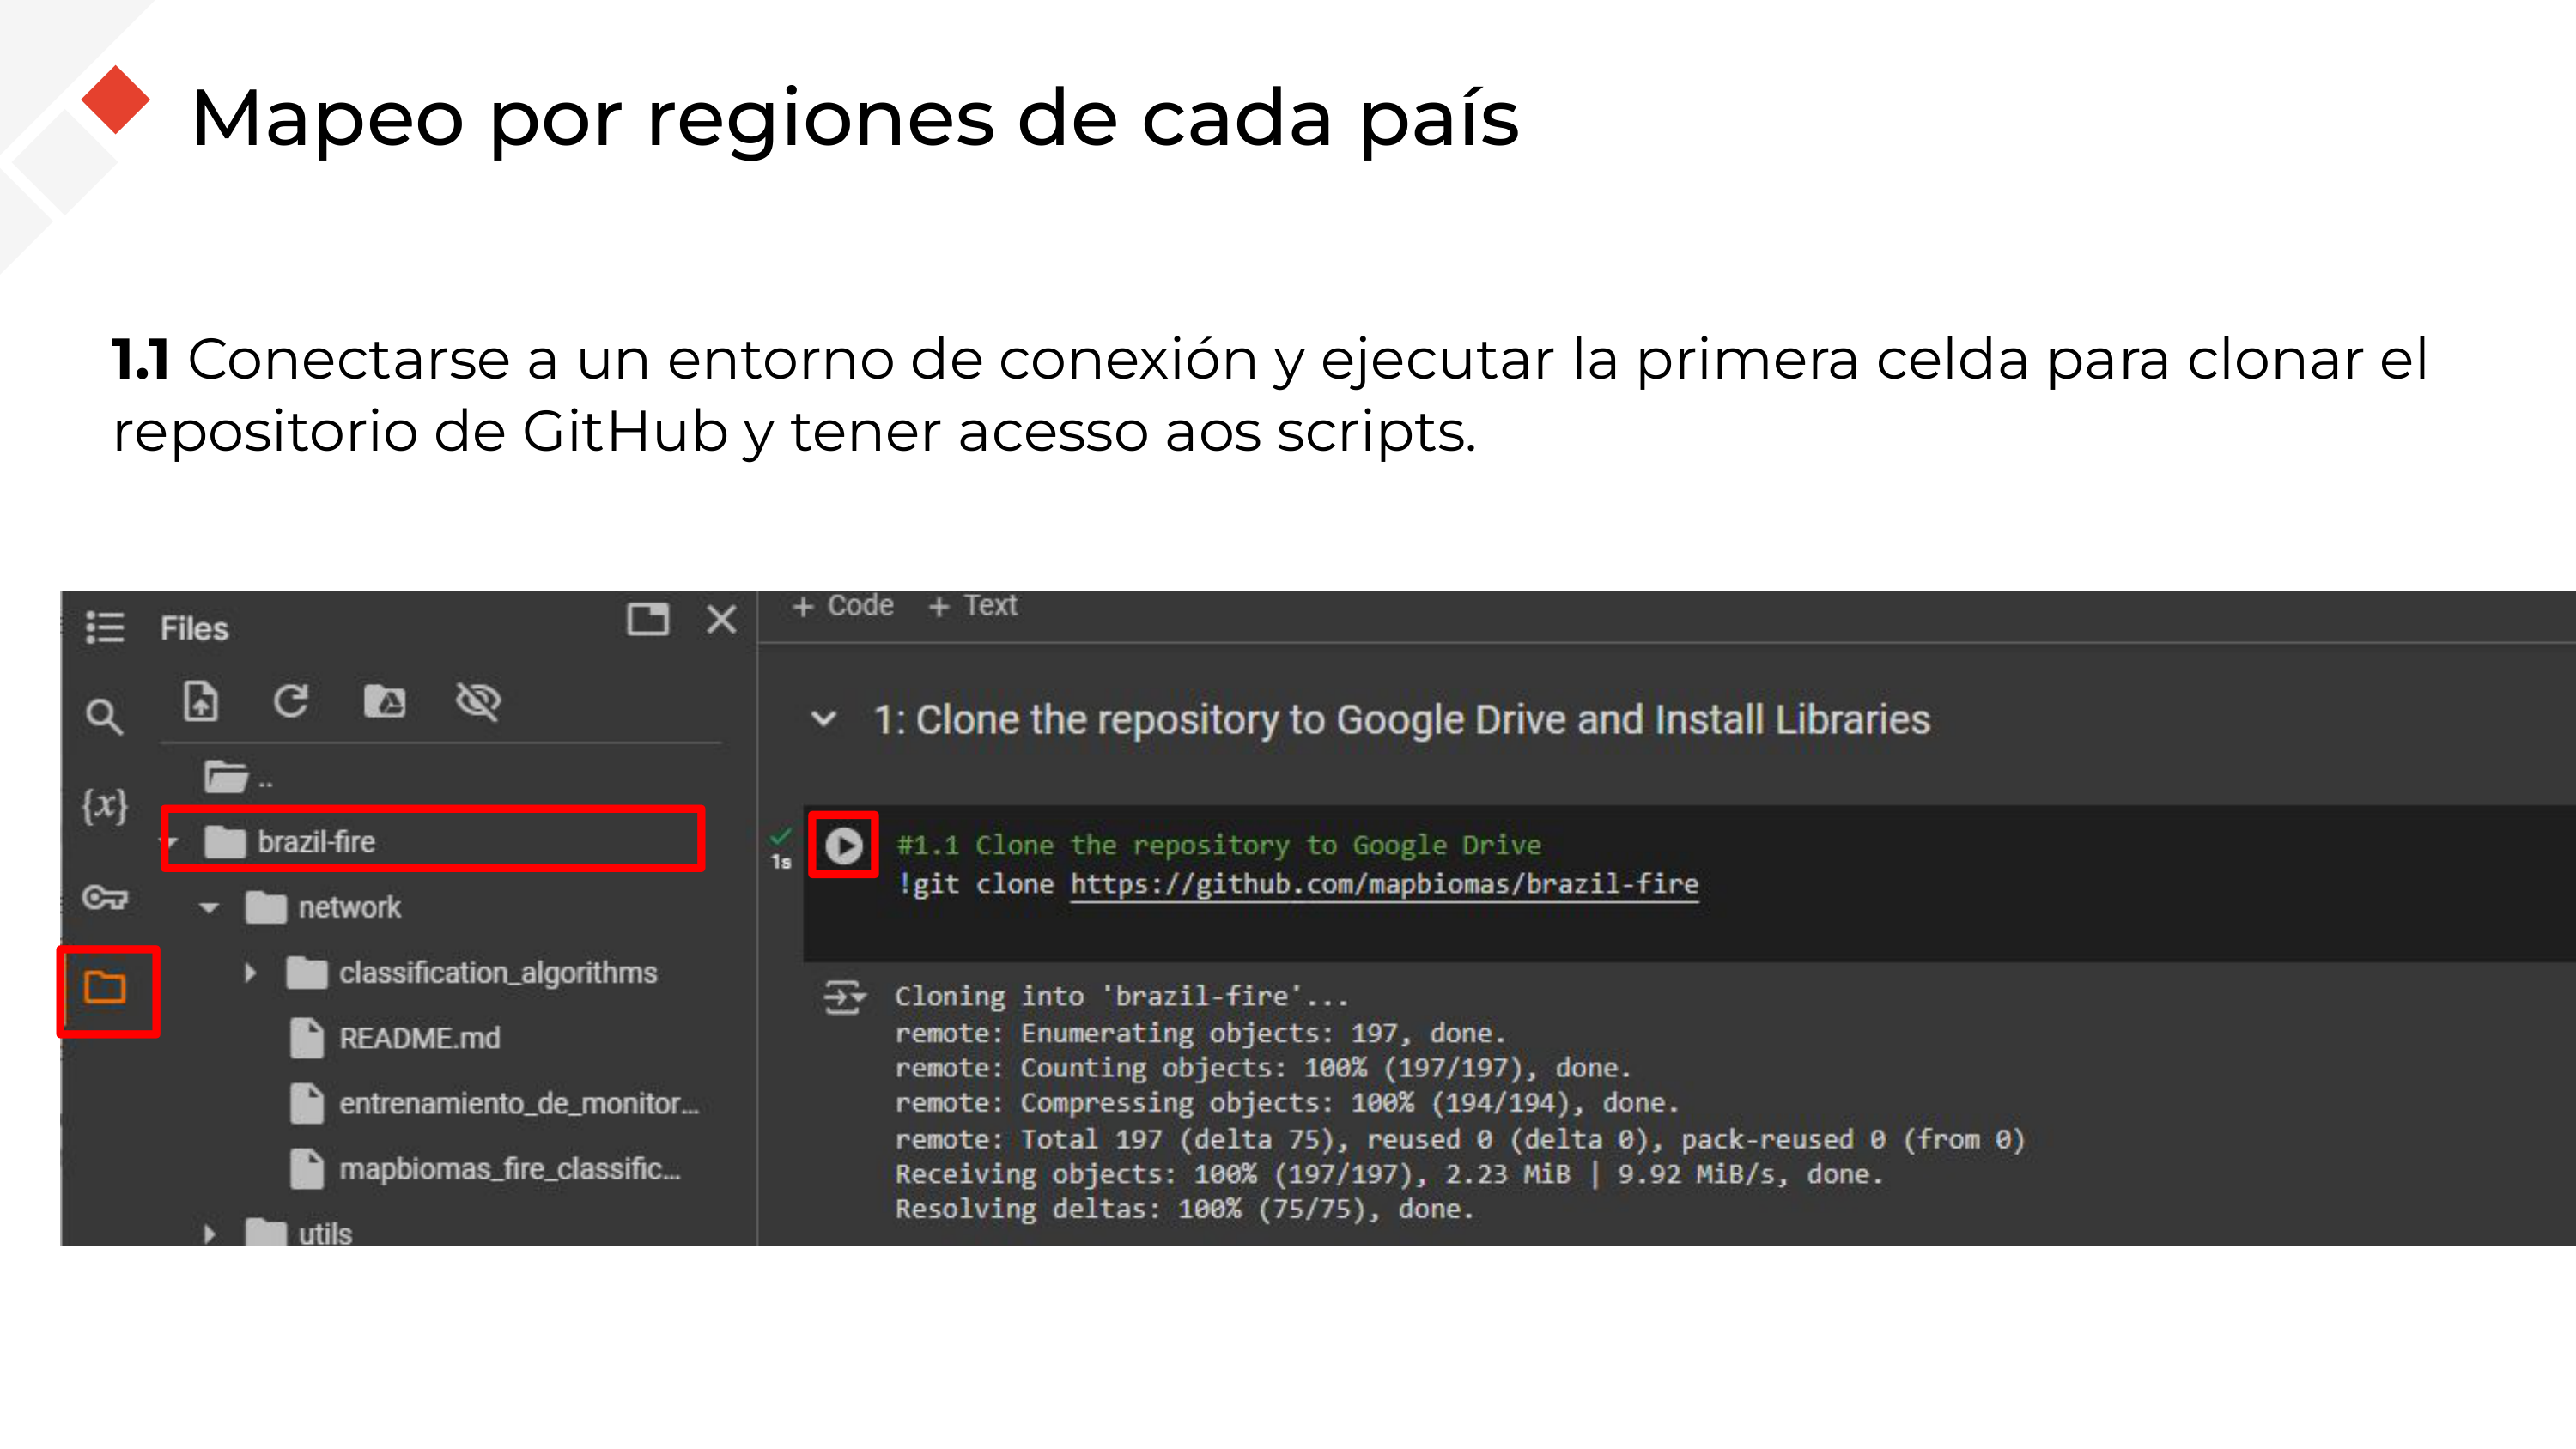

In [9]:
### OPTIONAL Step plus - Optinal presenting PDFs as slides in Google Colab
# Presenting PDFs as slides in Google Colab
exec(open(f'/content/brazil-fire/utils/google_collab_pdf_show.py').read())
pdf_path = '/content/brazil-fire/network/entrenamiento_de_monitoreo_de_cicatrices_de_fuego_en_regiones_de_la_red_mapBiomas.pdf'
display_pdf_viewer(pdf_path, external_link="https://docs.google.com/presentation/d/1MPoqHWHLw-jJqKUStikJ0Cc-8oLuMuKZ4_c_kQA3DKQ")


### Simple script for share acess toolkt in GEE toolkit interface to collect samples and avaliable results

In [7]:
### Step A_1_0 - Simple script for share acess toolkt in Google Earth Engine toolkit interface to collect samples and avaliable results
exec(open(f'{algorithms}/A_1_0_gee_gui_collect_samples_burned_area_classification.py').read())

### How it works and how to use the toolkit ###
Presentation: https://docs.google.com/presentation/d/1iMRXRH4xoWTFPSSzDOJkB6c7KJLPggxrnvYzVQ3BzP0/edit#slide=id.g220825c6698_0_546

### Access the Toolkit on GEE ###
Toolkit Link: https://code.earthengine.google.com/?scriptPath=users%2Fmapbiomasworkspace1%2Fmapbiomas-fire%3A1-Toolkit_Collection1%2FToolkit_samples_collection


### Simple graphic user interface to training the model

In [10]:
# Interface for visualizing the available samples for the selected country
# Select the version and region for training the model

# Step A_2_0 - Simple graphic user interface for the routine of training TensorFlow models
exec(open(f'{algorithms}/A_2_0_simple_gui_train_tensorflow_models.py').read())
### Step A_2_1 - Functions for training TensorFlow models per region
exec(open(f'{algorithms}/A_2_1_training_tensorflow_model_per_region.py').read())


Instructions for updating:
non-resource variables are not supported in the long term


HTML(value='<b>Selected country: guyana (8 files found)</b>')

Output(layout=Layout(border='1px solid black', height='150px', margin='10px 0', overflow_y='scroll'))

HTML(value='<b>Samples by region, and version available to run the training (5 samples):</b>')

⚠️Attention, files that already exist, if selected, are reprocessed and overwrite the file at the final address.⚠️


[LOG] [2024-10-22 18:00:23] [INFO] Filtered files: ['samples_fire_v1_l89_guyana_r4_guyana_lavrado_2023.tif']

[LOG] [2024-10-22 18:00:34] [INFO] Selected samples: ['samples_fire_v1_l89_guyana_r4_guyana_lavrado_2023.tif']

[LOG] [2024-10-22 18:00:41] [INFO] Starting image download and preparation for 1 images...



[INFO] Downloading and processing images:   0%|          | 0/1 [00:00<?, ?it/s]

[LOG] [2024-10-22 18:00:48] [INFO] Starting download of: samples_fire_v1_l89_guyana_r4_guyana_lavrado_2023.tif

[LOG] [2024-10-22 18:00:58] [SUCCESS] Download completed for samples_fire_v1_l89_guyana_r4_guyana_lavrado_2023.tif.

[LOG] [2024-10-22 18:01:05] [INFO] Processing image: /content/mapbiomas-fire/sudamerica/guyana/training_samples/samples_fire_v1_l89_guyana_r4_guyana_lavrado_2023.tif



[INFO] Downloading and processing images: 100%|██████████| 1/1 [00:42<00:00, 42.72s/it]


[LOG] [2024-10-22 18:01:31] [INFO] Concatenated data: (33896436, 5)

[LOG] [2024-10-22 18:02:45] [INFO] Valid data after filtering: (33896436, 5)

[LOG] [2024-10-22 18:02:52] [INFO] Training set size: 23727505 examples

[LOG] [2024-10-22 18:02:58] [INFO] Validation set size: 10168931 examples

[LOG] [2024-10-22 18:03:06] [INFO] Mean of training bands: [3.094936e-05 7.973664e-05 8.246550e-05 5.705046e-05]

[LOG] [2024-10-22 18:03:12] [INFO] Standard deviation of training bands: [0.00204957 0.00483013 0.00509554 0.00367985]

[LOG] [2024-10-22 18:03:19] [INFO] Setting up the TensorFlow graph...

[LOG] [2024-10-22 18:03:27] [INFO] TensorFlow graph setup complete.

[LOG] [2024-10-22 18:03:33] [INFO] Starting training session with GPU memory limited to 33.3% of available memory...

[LOG] [2024-10-22 18:03:40] [INFO] Initial variables loaded, session started.

[LOG] [2024-10-22 18:03:47] [INFO] Starting training loop with 7000 iterations...

[LOG] [2024-10-22 18:03:59] [INFO] Model saved loca

### Simple graphic user interface for burned area classification, using already trained models


In [ ]:
### Simple graphic user interface for burned area classification, using already trained models
# Step A_3_0 - Simple graphic user interface for selecting years for burned area classification
exec(open(f'{algorithms}/A_3_0_simple_gui_train_tensorflow_classification.py').read())

# Step A_3_1 - Functions for TensorFlow classification of burned areas
exec(open(f'{algorithms}/A_3_1_tensorflow_classification_burned_area.py').read())


HTML(value="<b style='color: red;'>No files found in the 'models' folder (Total: 0).</b>")

In [ ]:
# first_analyses_annual_burned_area

In [ ]:
# processing_subproducts